# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Исходные данные

In [457]:
# Обозначим эмпирические данные молодых и взрослых особей
# И затащим их в один массив
lam = [2, 333, 0.000025, 0.01]

# Сформируем вектор дополнительных данных 
# empi = [sigma1, sigma2, D, D0]
empi = [0.25, 0.003, 140, 60]

# Количество генерируемых стратегий
Nmax = 20

### 2.2 Генерации стратегий

In [458]:
#rn.seed(10)

# Старая версия генерации
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров в data_strat
def strategy1(Nmax):
    def rand_strat():
        A, B = [], []
        for i in range(0, Nmax):
            a = rn.uniform(-empi[2], 0)
            b = rn.uniform(0, min(-a, a + empi[2]))
            A.append(a)
            B.append(b)
            A.append(a)
            B.append(-b)
        return A, B

    A, B = rand_strat()
    data_strat1 = {'Aj': A, 'Bj': B}
    data1 = pd.DataFrame(data = data_strat1)
    #A, B = rand_strat()
    #data_strat2 = {'Aa': A, 'Ba': B}
    #data2 = pd.DataFrame(data = data_strat2)
    #data = pd.concat([data1, data2], axis=1)
    data1.to_csv("data_strat.csv", index=False)
    return data1

# Генерация с перемешиванием
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров в data_strat
def strategy2(Nmax):
    def rand_strat_A():
        A = []
        for i in range(0, Nmax):
            a = rn.uniform(-empi[2], 0)
            A.append(a)
        rn.shuffle(A)
        return A
    def rand_strat_B(a):
        A, B = [], []
        for i in range(0, Nmax):
            b = rn.uniform(-min(-a[i], a[i] + empi[2]), min(-a[i], a[i] + empi[2]))
            A.append(a[i])
            B.append(b)
            A.append(a[i])
            B.append(-b)
        return A, B

    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat1 = {'Aj': A, 'Bj': B}
    data1 = pd.DataFrame(data = data_strat1)
    #a = rand_strat_A()
    #A, B = rand_strat_B(a)
    #data_strat2 = {'Aa': A, 'Ba': B}
    #data2 = pd.DataFrame(data = data_strat2)
    #data = pd.concat([data1, data2], axis=1)
    data1.to_csv("data_strat.csv", index=False)
    return data1

#data_strat = strategy1(Nmax)
data_strat = strategy2(Nmax)
data_strat

,Aj,Bj
0,-73.415961,-62.174032
1,-129.046911,-3.850587
2,-102.303510,-31.878443
3,-18.656476,-17.590362
4,-41.566275,-7.355165
5,-14.484753,-4.935533
6,-132.491156,-4.223069
7,-17.568255,-10.355987
8,-65.050428,-16.730951
9,-59.214672,-37.862936


### 2.3 Подсчет макропараметров и создание выборки

In [460]:
import pandas as pd
import numpy as np
from collections import defaultdict
# Подсчет макропараметров с обычными функциями окружающей среды
# Запись их в data_macro
def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   #Aa = data_strat['Aa'].tolist()
   #Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(1, 5):
      collect['M' + str(i)] = []
   for i in range(0, len(data_strat)):
      collect['M1'].append(empi[0]*(Aj[i] + empi[2]))
      collect['M2'].append(-empi[1]*(Aj[i] + empi[2] + Bj[i]/2))
      collect['M3'].append(-2*np.pi*np.pi*Bj[i]*Bj[i])
      collect['M4'].append(-((Aj[i] + empi[3])**2 + (Bj[i]**2)/2))
      #collect['M5'].append(empi[0]*(Aa[i] + empi[2]))
      #collect['M6'].append(-empi[1]*(Aa[i] + empi[2] + Ba[i]/2))
      #collect['M7'].append(-2*np.pi*np.pi*Ba[i]*Ba[i])
      #collect['M8'].append(-((Aa[i] + empi[3])**2 + (Ba[i]**2)/2))
   # for i in range(1, 9):
   #    for j in range(1, 9):
   #       if i == j:
   #          Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(i)])
   #          collect_M['M' + str(i) + 'M' + str(i)].append(list(Z))
   #       else:
   #          continue
   # for i in range(2, 9):
   #    for j in range(1, i):
   #       Z = 2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
   #       collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
   #  
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 5):
      data['M' + str(i)] = collect['M' + str(i)]
   # for i in range(1, 9):
   #    for j in range(1, 9):
   #       if i == j:
   #          data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
   #       else:
   #          continue
   # for i in range(2, 9):
   #    for j in range(1, i):
   #       data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)

In [461]:
import pandas as pd
from collections import defaultdict
from sklearn.utils import shuffle
# Подсчет фитнесса
# Запись в data_fit_macro
def fitness():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()      
   M3 = data_macro['M3'].tolist()   
   M4 = data_macro['M4'].tolist()   
   #M5 = data_macro['M5'].tolist()
   #M6 = data_macro['M6'].tolist()
   #M7 = data_macro['M7'].tolist()
   #M8 = data_macro['M8'].tolist()
   J = []
   for i in range(len(data_strat)):
      # p = lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]
      # q = lam[1]*M2[i]
      # r = lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]
      # s = lam[5]*M6[i]
      # if ((4*r*p + (p + q - s)**2) < 0):
      #    J.append(0)
      # else:
      #    j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
      #    J.append(j)
      J.append(lam[0]*M1[i] + lam[1]*M2[i] + lam[2]*M3[i] + lam[3]*M4[i])
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   data = data.loc[data.J !=0]
   data = shuffle(data)
   data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

In [462]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit_macro.index)):
      for j in range(i + 1, len(data_fit_macro.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()
data_fit_macro_target


,J,M1,M2,M3,M4,target
0,8.904650,3.087228,-0.012530,-10110.884771,715.546991,1.0
1,-8.904650,-3.087228,0.012530,10110.884771,-715.546991,-1.0
2,25.714526,8.969872,-0.077652,-10927.772209,3390.594300,1.0
3,-25.714526,-8.969872,0.077652,10927.772209,-3390.594300,-1.0
4,61.076445,-20.473522,0.277368,-11074.605192,993.686951,1.0
...,...,...,...,...,...,...
1555,16.111396,-13.576270,0.174401,-6915.224143,-1463.862758,1.0
1556,-14.598798,5.072872,-0.076158,9711.454317,37.339022,-1.0
1557,14.598798,-5.072872,0.076158,-9711.454317,-37.339022,1.0
1558,1.512598,-8.503398,0.098242,2796.230174,-1426.523736,1.0


In [463]:
import numpy as np
from collections import defaultdict
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target
def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 5):
      max_M.append(max(np.abs(data_param['M' + str(i)].tolist())))
      Z = list(np.array(data_param['M' + str(i)].tolist())/max(np.abs(data_param['M' + str(i)].tolist())))
      data['M' + str(i) + '_n'] = Z
   #for i in range(1, 9):
   #   for j in range(1, 9):
   #      if i == j:
   #         max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
   #         Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
   #         data['M' + str(i) + 'M' + str(j) + '_n'] = Z
   #      else:
   #         continue   
   #for i in range(2, 9):
   #   for j in range(1, i):
   #      max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
   #      Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
   #      data['M' + str(i) + 'M' + str(j) + '_n'] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1_n,M2_n,M3_n,M4_n,target
0,0.090243,-0.030776,-0.132508,0.116291,1.0
1,-0.090243,0.030776,0.132508,-0.116291,-1.0
2,0.262199,-0.190723,-0.143214,0.551042,1.0
3,-0.262199,0.190723,0.143214,-0.551042,-1.0
4,-0.598462,0.681254,-0.145138,0.161495,1.0
...,...,...,...,...,...
1555,-0.396848,0.428352,-0.090628,-0.237908,1.0
1556,0.148285,-0.187055,0.127274,0.006068,-1.0
1557,-0.148285,0.187055,-0.127274,-0.006068,1.0
1558,-0.248563,0.241297,0.036646,-0.231840,1.0


### 2.4 Проверка корреляции

<AxesSubplot:>

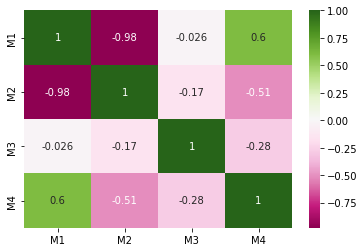

In [464]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

X = data_norm.drop('target', axis=1)
correlation = X[['M' + str(i) + '_n' for i in range(1, 5)]]
correlation.rename(columns={'M' + str(i) + '_n': 'M' + str(i) for i in range(1, 9)}, inplace=True)
sea.heatmap(correlation.corr(), annot=True, cmap="PiYG")

### 2.5 Реализация машинного обучения для SVM и LDA

In [465]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [466]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [467]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [468]:
from sklearn.linear_model import Perceptron
model_norm = Perceptron(random_state=12345)
model_norm.fit(X, y, coef_init=[0,0,0,0])
model_coef = list(model_norm.coef_[0])

In [469]:
# Подсчет точности SVM и LDA
from sklearn.metrics import accuracy_score
from sklearn import model_selection
# print('Точность классификатора:')
# print('     SVM: ', accuracy_score(SVC_prediction, y_test))
# print('     LDA: ', accuracy_score(LDA_prediction, y_test))

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Logloss:')
print('     SVM: ', SVM.std())
print('     LDA: ', LDA.std())



Logloss:
     SVM:  0.02271800659829402
     LDA:  0.015909838007680612


<AxesSubplot:>

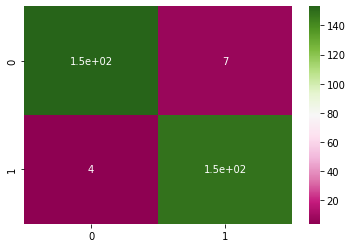

In [470]:
from sklearn.metrics import confusion_matrix
import seaborn as sea
cnf_matrix = confusion_matrix(y_test, SVC_prediction)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")


In [471]:
SV = [SVC_coef[i]/Max_M[i] for i in range(len(SVC_coef))]
print(SV)
print(lam)

print('         ')

Par = [model_coef[i]/Max_M[i] for i in range(len(model_coef))]
print(Par)
print(lam)

print('         ')

LD = [LDA_coef[i]/Max_M[i] for i in range(len(LDA_coef))]
print(LD)
print(lam)

[-0.0689924814940535, 15.263340236074015, -4.2680460495453304e-05, 0.0012561319966339672]
[2, 333, 2.5e-05, 0.01]
         
[0.04788636871868954, 53.41089505425477, -3.701174301009165e-05, 0.0030731434320109365]
[2, 333, 2.5e-05, 0.01]
         
[0.6113322764270579, 72.98268991759947, 1.079216087849282e-05, 0.0012717119035447666]
[2, 333, 2.5e-05, 0.01]


In [472]:
def module(u):
    ans = 0
    for elem in u:
        ans += elem * elem
    return ans

def sc(u, v):
    ans = 0;
    for i in range(len(u)):
        ans += u[i] * v[i];
    return ans;


def cos_n(u, v):
    return sc(u, v) / np.sqrt(module(u) * module(v))

print(cos_n(SV, lam))
print(cos_n(Par, lam))
print(cos_n(LD, lam))


0.9999446003187374
0.9999869468266581
0.9999971908288399
